In [77]:
try:
    from keras_preprocessing import image as img
    import os
    from matplotlib import pyplot as plt
    import idx2numpy
    import keras_preprocessing
    import tensorflow as tf
    import numpy as np
    import keras
    from functools import partial
except:
    %pip install manim
    %pip install colour
    %pip install matplotlib
    %pip install tensorflow.keras
    %pip install pydot
    %pip install pydotplus
    %pip install graphviz
    %pip install ipykernel
    %pip install keras_preprocessing
    %pip install matplotlib
    %pip install idx2numpy
    %pip install pillow
    %pip install tensorflow==2.18.0
    %pip install keras==3.8.0
    from keras_preprocessing import image as img
    import os
    from matplotlib import pyplot as plt
    import idx2numpy
    import keras_preprocessing
    import tensorflow as tf
    import numpy as np
    import keras
    from functools import partial

In [78]:
plt.figure(figsize=(19,10))

<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

In [79]:
modelo_dig = tf.keras.models.load_model("model_network/output00.h5")

In [80]:
modelo_dig.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 2)      │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 4)      │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,140 (4.46 KB)

 Trainable params: 1,138 (4.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [81]:
nbits = 128
point_fixed = 8

In [82]:
os.system("rm ./simulation/I.txt")

0

In [83]:
sizt = 28
path = "mnist/data/t10k-images-idx3-ubyte"

In [84]:
def int2comp2(val, nbits=nbits):
    return hex((val + (1 << nbits)) % (1 << nbits))


In [85]:
def comp2int(val, nbits=nbits):
    val=int(val,16)
    if(val & 1 << nbits-1):
        return (~val+1)%(1<<nbits)*(-1)
    return val


In [86]:
def concat(n,nbits=nbits,fator=1):
    return [comp2int(n,nbits)/fator]

In [87]:
def concat2(n,nbits=nbits,fator=16):
    # print([comp2int(n,nbits)/fator])
    return [comp2int(n,nbits)/fator]

In [88]:
def import_img(path_file,fator=1):
    out2 = path_file
    m2=[]
    k2 = out2.readlines()
    for i in k2:
        m2.append(list(map(concat,i.split())))
    plt.imshow(m2,cmap="gray")
    # plt.imsave('fig7.png',m2,cmap='gray')
    return np.array(m2).copy()

In [178]:
def import_img2(path_file,fator=1,string='fig.png',transpor=0):
    out2 = path_file
    m2=[]
    k2 = out2.readlines()
    for i in k2:
        m2.append(list(map(concat2,i.split())))
    plt.imshow(m2,cmap ='viridis')
    plt.imsave(string,m2,cmap='viridis')
    if(transpor):
        return m2.T
    return m2

In [185]:
def import_img3(path_file,fator=1,string='fig.png',transpor=0):
    out2 = path_file
    m2=[]
    k2 = out2.readlines()
    for i in k2:
        m2.append(list(map(concat2,i.split())))
    m2 = list(np.array(m2).T)
    plt.imshow(m2,cmap ='viridis')
    plt.imsave(string,m2,cmap='viridis')
    if(transpor):
        return m2.T

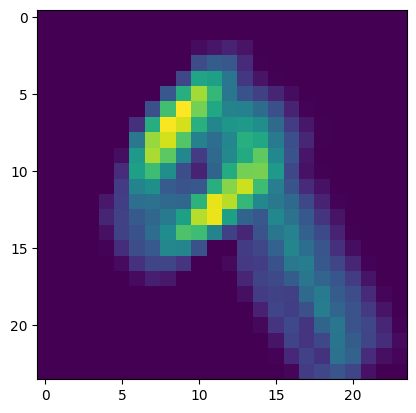

In [168]:
a = import_img2(path_file=open('simulation/convIxKernelOut0.txt'),fator=1,string="images/conv1_layer0.png")
plt.imshow(a)
# plt.imsave(a,'aa.png',cmap='gray')
# a/np.array(a).max()

In [90]:
def exportInput_txt(imag,path_file,nbits=16,fixed_point=8):
    for i in imag:
        for j in i:
            # strtmp = int2comp2(1 if(j >=50) else 0, nbits)[2:]
            strtmp = int2comp2((int(j/255*2**fixed_point)), nbits)[2:]

            strtmp2 = strtmp+' '
            print(strtmp2,end=' ')
            path_file.write(strtmp2)
            # print(f'{strtmp2}',end='  ')
        print("\n")
        path_file.write("\n")
    path_file.close()


In [91]:
def kernel_txt(nbits,point_fixed,i,j,kernel,string='Kernel'):
    ker = open(f"simulation/{string}{j}{i}.txt",'w')
    kernel0_0 = np.array(kernel)
    for i in kernel0_0:
        for j in i:
            print(int((j*2**point_fixed)),end=' ')
            strtmp2 = int2comp2(int(j*2**point_fixed),nbits)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        ker.write("\n")
        print('\n')
    ker.close()

In [92]:
def bias_txt(nbits,point_fixed,i,bias,string='bias'):
    ker = open(f"simulation/{string}{i}.txt",'w')
    kernel0_0 = np.array(bias)
    base = point_fixed
    print(base)
    for j in kernel0_0:
        # for j in i:
            print((int(j*2**base)),end=' ')
            strtmp2 = int2comp2(int(j*2**point_fixed),nbits)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        # ker.write("\n")
            # print('\n')
    ker.close()

In [93]:
sizeM = open("./simulation/sizeM.txt","w")
sizeM.write(str(sizt))
sizeM.close()
f = open("./simulation/I.txt","w")

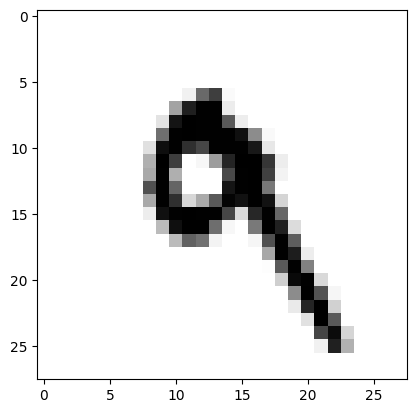

In [94]:
array = idx2numpy.convert_from_file(path)[7]
plt.imshow(array,cmap='binary')
# array

In [95]:
exportInput_txt(imag=array,path_file=f)

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  e  95  c1  5  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  5b  e0  fd  fd  13  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  1c  eb  fe  fd  fd  a6  12  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  90  fd  fe  fd  fd  fd  ee  73  6  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  1f  f1  fd  d0  b9  fd  fd  fd  e7  18  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0

In [96]:
array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [97]:
modelo_dig.predict(array.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [98]:
modelo_dig.predict(array.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [99]:
modelo_dig.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 2)      │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 4)      │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,140 (4.46 KB)

 Trainable params: 1,138 (4.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [100]:
kernels = modelo_dig.weights[5]


In [101]:
bias = np.array(modelo_dig.weights[1])

In [102]:
bias_txt(nbits,point_fixed,0,modelo_dig.weights[1])

8
-23 -42 

In [103]:
bias_txt(nbits,point_fixed,5,modelo_dig.weights[5])

8
5 183 -13 -134 49 49 -64 128 -187 -123 

In [104]:
cc = modelo_dig.weights[4]

In [105]:
bias_txt(nbits,point_fixed,2,modelo_dig.weights[1])

8
-23 -42 

In [106]:
modelo_dig.weights[0]
kernels = modelo_dig.weights[0]
kernels;

In [107]:
bias_txt(nbits,point_fixed,2,modelo_dig.weights[3])


8
-66 -85 -14 -38 

In [108]:
lim = np.array(kernels.shape)[::-1][0]
for i in range(lim):
    kernel_txt(nbits,point_fixed,i,0,modelo_dig.weights[0][:,:,0,i])
    print("--------------------------------------------------------------------",i+1)

-17 17 -99 49 114 

-41 -50 141 87 80 

-34 90 104 160 -54 

59 122 85 67 -71 

69 72 19 27 -80 

-------------------------------------------------------------------- 1
-10 -11 -10 -27 -60 

106 -20 -47 -9 -129 

111 97 46 -34 61 

75 150 69 182 87 

-30 63 90 9 95 

-------------------------------------------------------------------- 2


kernel0

In [109]:
#  modelo_dig.weights[2].shape

In [110]:
# lims = int(np.array(kernels2d_1.shape)[::-1][0])
# limi = int(np.array(kernels2d_1.shape)[::-1][1])
# (limi,lims)

In [111]:
kernels2d_1 = modelo_dig.weights[2]
lims = int(np.array(kernels2d_1.shape)[::-1][0])
limi = int(np.array(kernels2d_1.shape)[::-1][1])
for i in range(limi):
    for j in range(lims):
        print("-------------------------------",i+1,j+1)
        kernel_txt(nbits,point_fixed,j,i,kernels2d_1[:,:,i,j],string=f"kernels2d_")


------------------------------- 1 1
82 -11 -35 

13 269 102 

123 193 245 

------------------------------- 1 2
-80 -90 -57 

10 131 120 

-6 -122 -43 

------------------------------- 1 3
-137 -106 -64 

61 29 45 

-71 -33 -33 

------------------------------- 1 4
67 -13 75 

144 34 -11 

-52 46 -18 

------------------------------- 2 1
5 -129 -22 

-113 -123 -119 

-20 -120 -60 

------------------------------- 2 2
111 187 170 

93 -51 -10 

-106 -87 -135 

------------------------------- 2 3
77 -90 113 

246 123 45 

82 72 -50 

------------------------------- 2 4
-44 84 -15 

-19 83 -65 

79 -6 141 



In [112]:
kernel_txt(nbits,point_fixed,0,0,modelo_dig.weights[4],string="danse.txt")

-81 -133 -69 -107 -40 -45 14 -148 20 -21 

-224 -128 6 -73 -11 -216 -164 -51 -230 -270 

-84 -43 -122 -57 36 -115 -91 -17 -109 -25 

-93 -107 -126 -60 -52 -103 16 12 -37 -121 

-115 -115 -64 -102 37 -39 2 -74 12 12 

-96 -46 -29 42 -315 -131 -257 -7 -51 -22 

-92 -80 -64 -33 9 5 -120 48 -10 -62 

-57 -65 -18 -60 3 -22 -44 24 -27 -104 

-46 -41 -74 -96 -10 -32 37 -58 -26 16 

-106 -311 11 -48 -277 -56 -54 43 -53 -82 

4 -84 -61 -10 -142 -28 -164 -4 -63 58 

-20 32 -14 -49 24 -98 -62 31 21 -109 

-100 4 -129 -98 86 -8 -35 -24 -82 -112 

-41 -111 -89 -61 -346 111 70 -77 -79 -93 

16 -25 20 38 -74 -94 -215 -25 -52 56 

27 4 -7 -23 1 -61 -128 -99 32 18 

-102 -22 -175 -189 77 101 -52 -30 -136 -141 

-133 -109 -111 -179 -115 -49 57 -216 -85 -253 

3 -111 -21 -90 14 33 -145 -48 46 28 

-17 -25 -95 -58 0 2 14 -16 -6 -23 

-2 -58 -139 -132 8 -96 45 -119 -104 30 

-108 -43 65 39 -290 -120 -421 -51 -187 -222 

-63 -68 26 -70 -82 -175 -126 -32 -69 -56 

-32 -23 -72 -26 -101 -76 -4 -108 -1 -66 

0 

In [113]:
import subprocess
subprocess.run('cds',shell=True)
subprocess.run('cds && runp.sh',shell=True)

/bin/sh: cds: command not found
/bin/sh: cds: command not found


CompletedProcess(args='cds && runp.sh', returncode=127)

In [114]:
out = open("simulation/maxpooling0.txt","r")

klin1 = []
m1=[]
k= out.readlines()
for i in k:
    m1.append(list(map(concat,i.split())))


In [115]:
# array_out =[]

# for i in range(1):
#     array_out.append(open(f"./simulation/maxIxKernelPooling{i}.txt","r"))
# klin2 = []
# plt.figure(figsize=(30,2))
# for ii in range(2):
#     k2 = array_out[ii].readlines()
#     m2=[]
#     for i in k2:
#         m2.append(list(map(concat,i.split())))
#     plt.subplot(1,2,ii+1)
#     plt.imshow(m2,cmap="gray")
# # plt.imshow(m2)

# for i in range(2):
#     array_out[i].close()


In [116]:
# m2

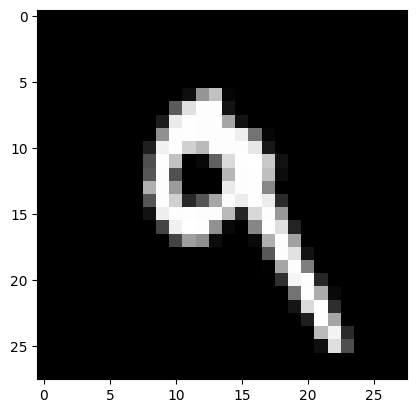

In [117]:
out2 = open("./simulation/I.txt","r")
import_img(path_file=out2);

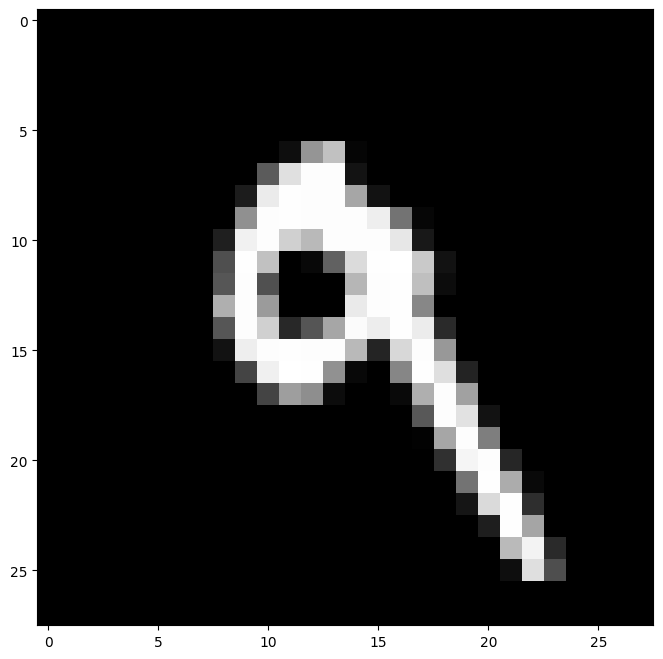

In [118]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.imshow(array,cmap="gray")


In [119]:
cmap='viridis'

In [120]:
plt.imsave("7.png",array,cmap="gray")

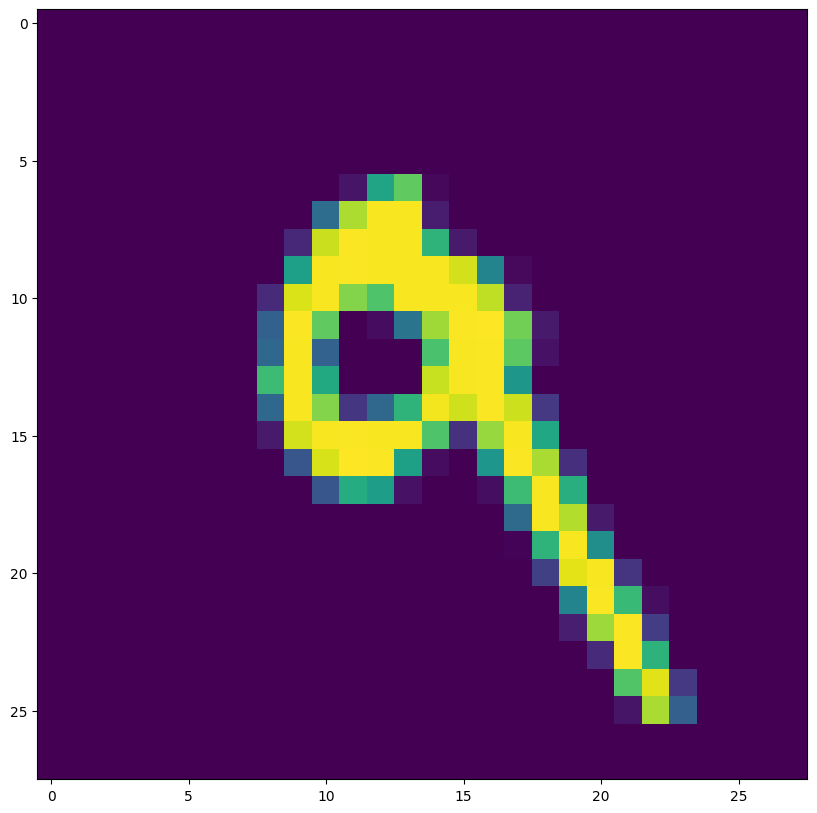

In [236]:
plt.figure(figsize=(10,10))
a = import_img2(path_file=open('./simulation/I.txt'),fator=1,string="images/input.png");
plt.savefig("images/input.png")
# plt.imsave('images/input.png',a.reshape(28,28),cmap=cmap)
# a.shape

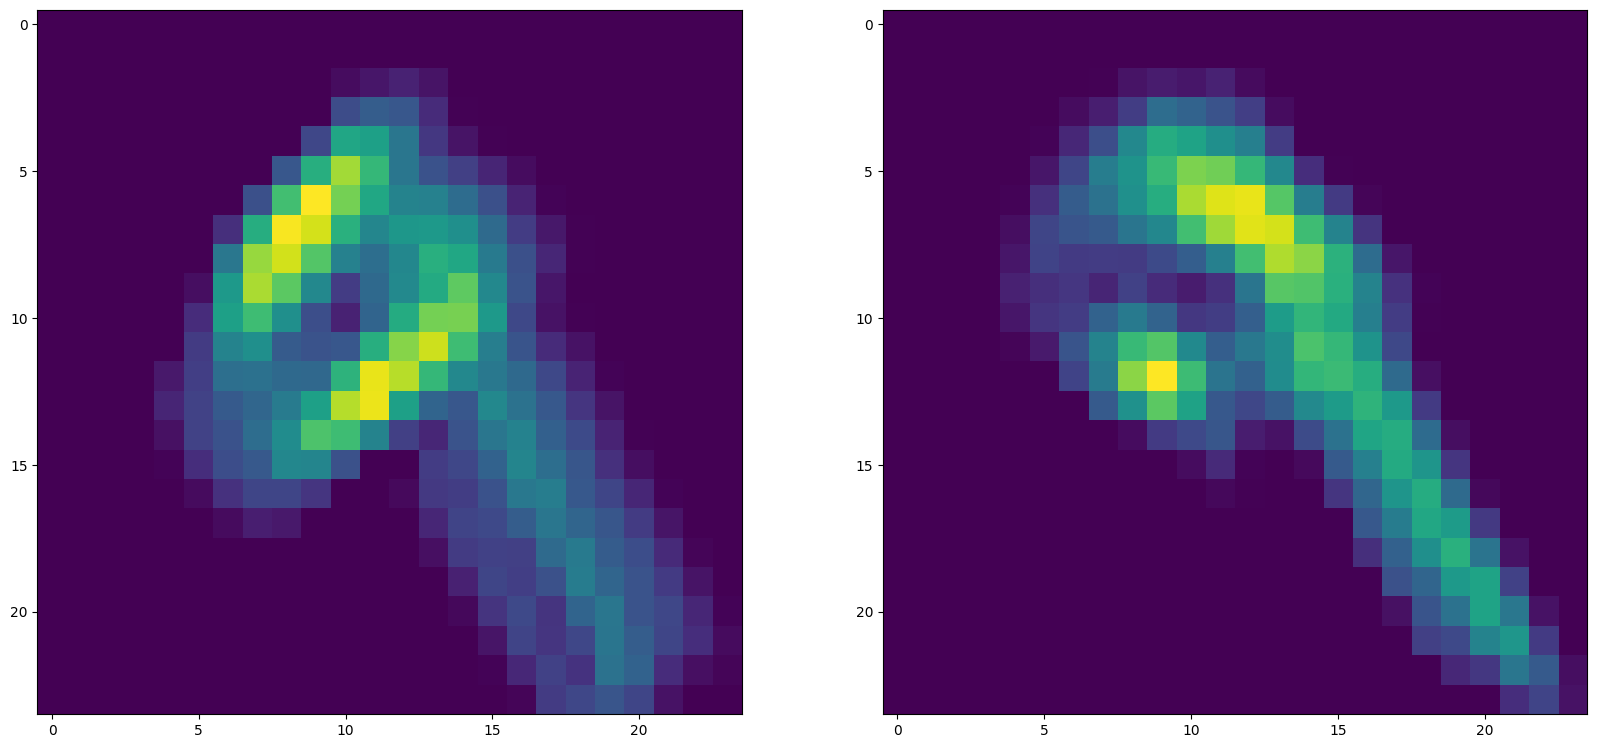

In [234]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
a = import_img2(path_file=open('simulation/convIxKernelOut0.txt'),fator=1,string="images/conv1_layer0.png")
# plt.savefig("images/conv1_layer0.png")

plt.subplot(1,2,2)
import_img2(path_file=open('simulation/convIxKernelOut1.txt'),fator=1,string="images/conv1_layer1.png");
plt.savefig("images/conv1_layer0.png")

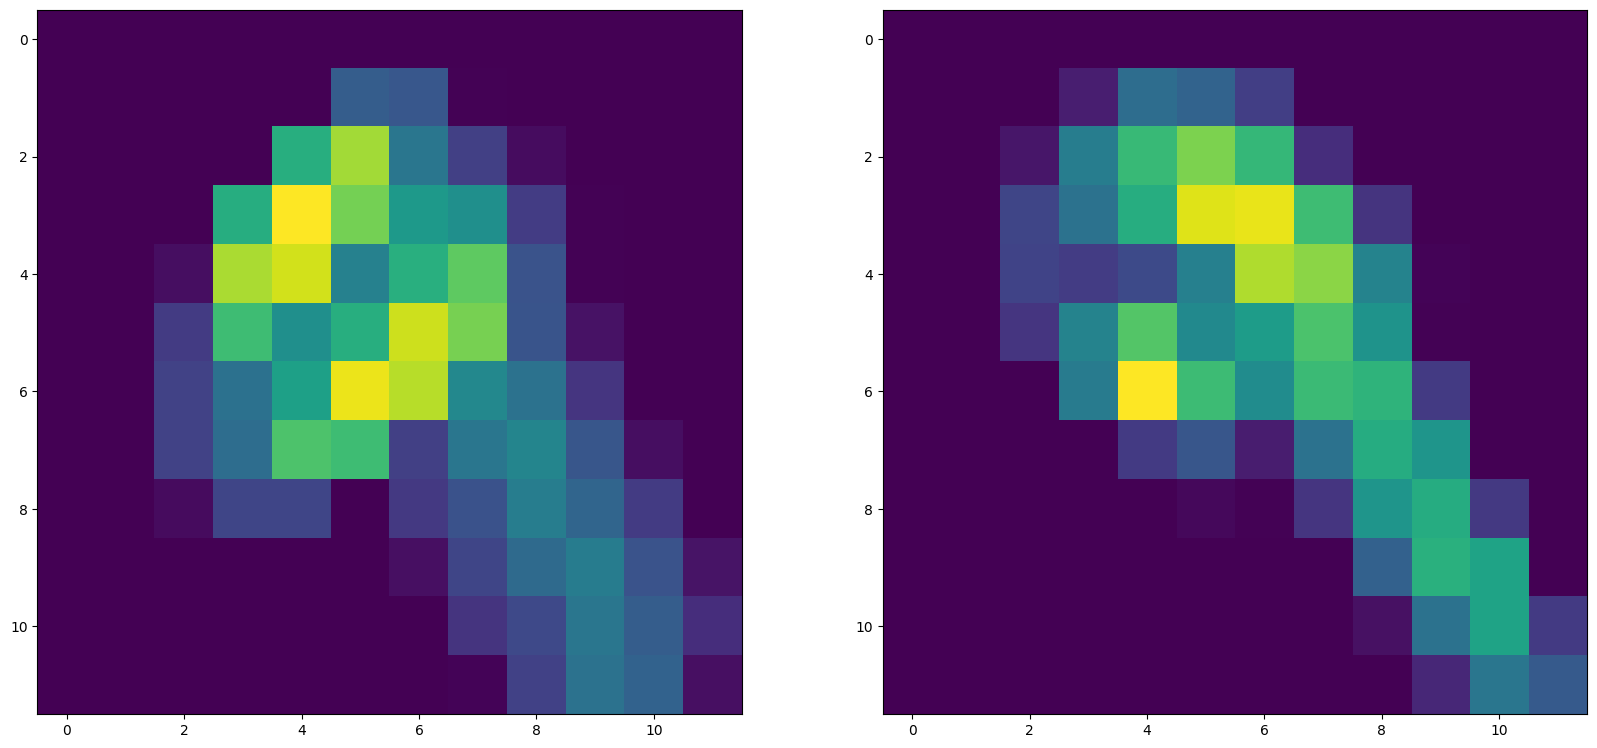

In [241]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
import_img2(path_file=open('simulation/maxpooling0.txt'),fator=1,string="images/maxpooling0_layer2.png");
plt.subplot(1,2,2)
import_img2(path_file=open('simulation/maxpooling1.txt'),fator=1,string="images/maxpooling1_layer2.png");
plt.savefig("images/maxpooling0_layer2.png")

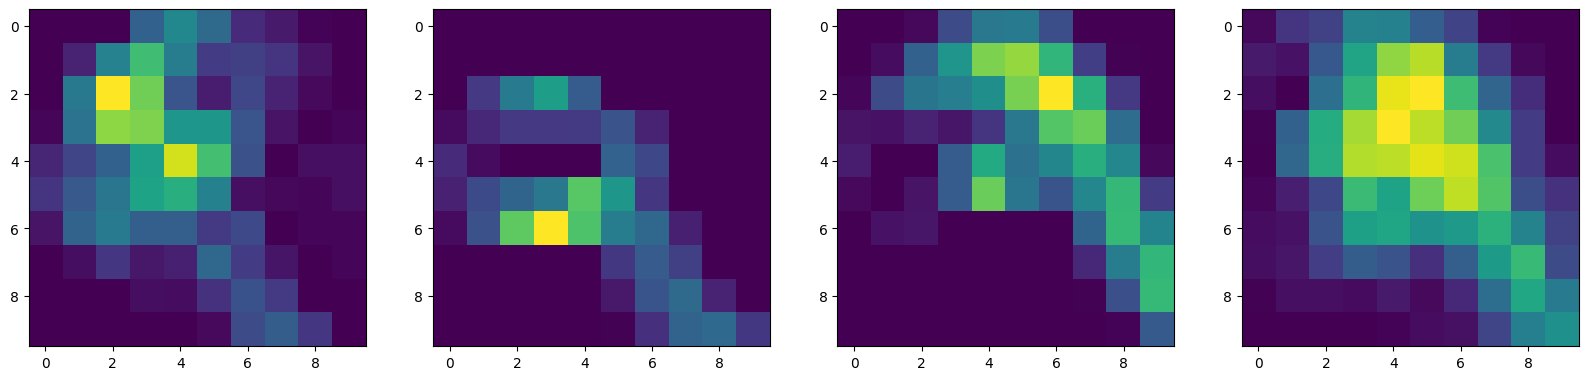

In [233]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
import_img2(path_file=open('simulation/convIxKernelOut_F01.txt'),fator=1,string="images/conv0_layer3.png");
plt.subplot(1,4,2)
import_img2(path_file=open('simulation/convIxKernelOut_F02.txt'),fator=1,string="images/conv1_layer3.png");
plt.subplot(1,4,3)
import_img2(path_file=open('simulation/convIxKernelOut_F03.txt'),fator=1,string="images/conv2_layer3.png");
plt.subplot(1,4,4)
import_img2(path_file=open('simulation/convIxKernelOut_F04.txt'),fator=1,string="images/conv3_layer3.png");
plt.savefig("images/conv0_layer3.png")


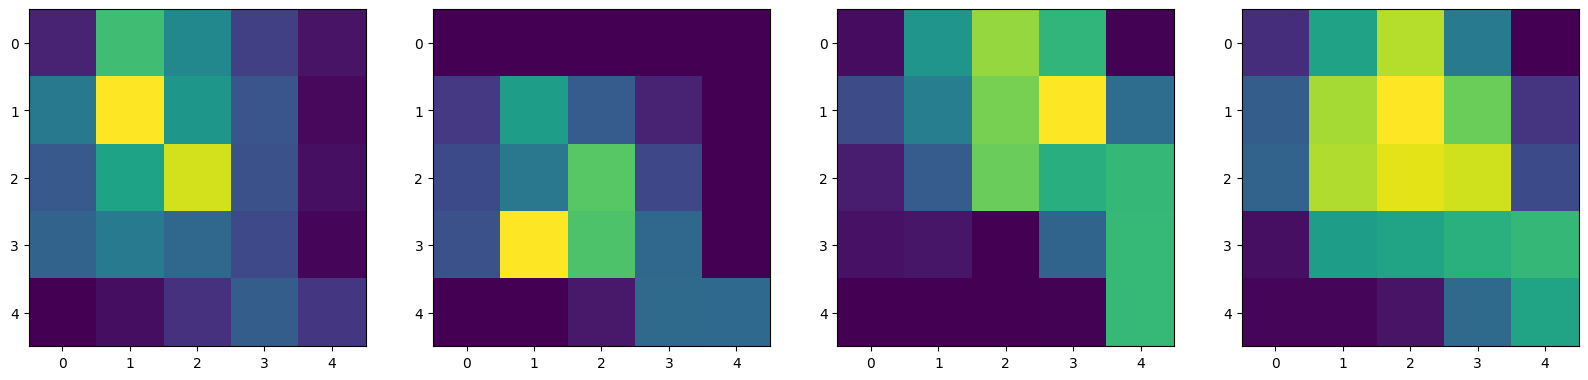

In [232]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
import_img2(path_file=open('simulation/maxpoolingF1.txt'),fator=1,string="images/maxpooling0_layer4.png");
plt.subplot(1,4,2)
import_img2(path_file=open('simulation/maxpoolingF2.txt'),fator=1,string="images/maxpooling1_layer4.png");
plt.subplot(1,4,3)
import_img2(path_file=open('simulation/maxpoolingF3.txt'),fator=1,string="images/maxpooling2_layer4.png");
plt.subplot(1,4,4)
import_img2(path_file=open('simulation/maxpoolingF4.txt'),fator=1,string="images/maxpooling3_layer4.png");
plt.savefig("images/maxpooling0_layer4.png")

In [226]:
def import_img3(path_file,fator=1,string='fig.png',transpor=0):
    out2 = path_file
    m2=[]
    k2 = out2.readlines()
    for i in k2:
        m2.append(list(map(concat2,i.split()))[0])
    # m2 = list(np.array(m2).T)
    # print(m2)
    plt.imshow(np.array(m2).T,cmap ='viridis')
    plt.imsave(string,np.array(m2).T,cmap='viridis')
    if(transpor):
        return m2
    

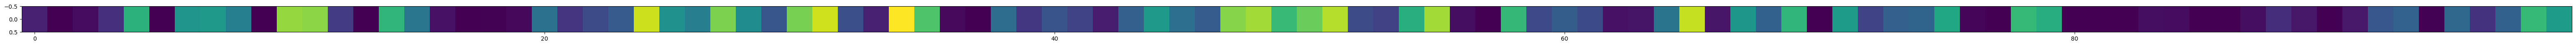

In [230]:
plt.figure(figsize=(80,40))
import_img3(path_file=open('simulation/flatten.txt'),fator=1,string='images/flatten_layer5.png');
plt.savefig("images/flatten_layer5.png")

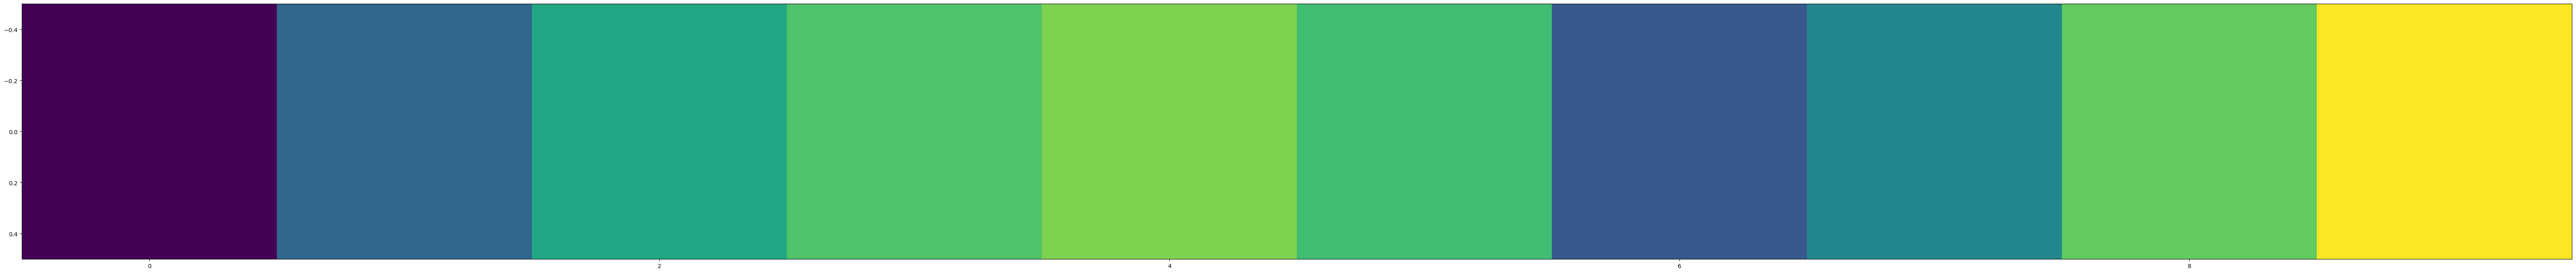

In [231]:
plt.figure(figsize=(80,40))
import_img3(path_file=open('simulation/dense.txt'),fator=1,string='images/dense_layer6.png');
plt.savefig("images/dense_layer6.png")

In [ ]:
# plt.imsave()

In [ ]:
# img.save_img("./images/preprocessamento.jpg",array)


In [ ]:
# os.system("rm ./images/preprocessamento.jpg")
# os.system("rm ./images/posprocessamento.jpg")

# img.save_img("./images/preprocessamento.jpg",array)
# img.save_img("./images/posprocessamento.jpg",m1)
# img.save_img("./images/maxpoolingposprocessamento.jpg",m2)


In [ ]:
dens = open("simulation/dense.txt")
klin2 = []
m2=[]
k2 = dens.readlines()
for i in k2:
    m2.append(list(map(concat,i.split()))[0][0])
    print(m2)
m2 =(np.array(m2))
m2
(np.array(m2,int))

[-212166517874.0]
[-212166517874.0, -180574259603.0]
[-212166517874.0, -180574259603.0, -154815530711.0]
[-212166517874.0, -180574259603.0, -154815530711.0, -142683347227.0]
[-212166517874.0, -180574259603.0, -154815530711.0, -142683347227.0, -134785383842.0]
[-212166517874.0, -180574259603.0, -154815530711.0, -142683347227.0, -134785383842.0, -145781953376.0]
[-212166517874.0, -180574259603.0, -154815530711.0, -142683347227.0, -134785383842.0, -145781953376.0, -185307901171.0]
[-212166517874.0, -180574259603.0, -154815530711.0, -142683347227.0, -134785383842.0, -145781953376.0, -185307901171.0, -167681425335.0]
[-212166517874.0, -180574259603.0, -154815530711.0, -142683347227.0, -134785383842.0, -145781953376.0, -185307901171.0, -167681425335.0, -139479319049.0]
[-212166517874.0, -180574259603.0, -154815530711.0, -142683347227.0, -134785383842.0, -145781953376.0, -185307901171.0, -167681425335.0, -139479319049.0, -116425649451.0]


array([-212166517874, -180574259603, -154815530711, -142683347227,
       -134785383842, -145781953376, -185307901171, -167681425335,
       -139479319049, -116425649451])

In [ ]:
m2.argmax()

np.int64(9)

In [ ]:
a =m2
n = 48
s = sum([np.exp(a[i]/2**n) for i in range(len(a))])
print(s)
h = np.array([np.exp(a[i]/2**n)/s for i in range(len(a))])
(h.argmax(),h.max())

9.994389394150303


(np.int64(9), np.float64(0.1000147601933082))

In [ ]:
-np.array(m2/2**32,float)

array([49.39886692, 42.04322109, 36.04579966, 33.22105557, 31.38216768,
       33.94250604, 43.1453579 , 39.04137419, 32.47505963, 27.1074589 ])

In [ ]:
a =np.array(m2/2**32,float)
n = 0
s = sum([np.exp(a[i]/2**n) for i in range(len(a))])
print(s)
h = np.array([np.exp(a[i]/2**n)/s for i in range(len(a))])
(h.argmax(),h.max())

1.7251796807544356e-12


(np.int64(9), np.float64(0.9784662430793594))

In [ ]:
# from matplotlib import pyplot as plt

TypeError: Invalid shape (10,) for image data

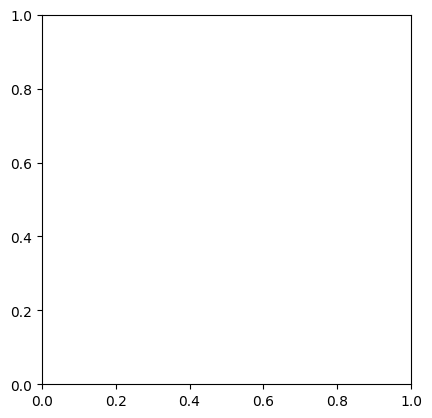

In [ ]:
plt.imshow(h)